In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("stdn_scrs.csv")
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [9]:
data.isnull().sum()


Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop unnamed column

In [11]:
data = data.drop("Unnamed: 0",axis = 1)
data.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# gender distribution

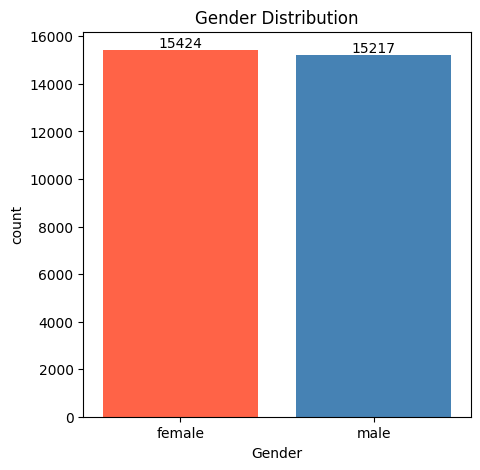

In [25]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = data, x = "Gender")
colors = ['#FF6347', '#4682B4']  # Specify your colors here
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)
ax.bar_label(ax.containers[0])
plt. title("Gender Distribution")
plt.show()

from the above chart we have analysed that:
the number of females in the data is more than the number of males

In [19]:
gb = data.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


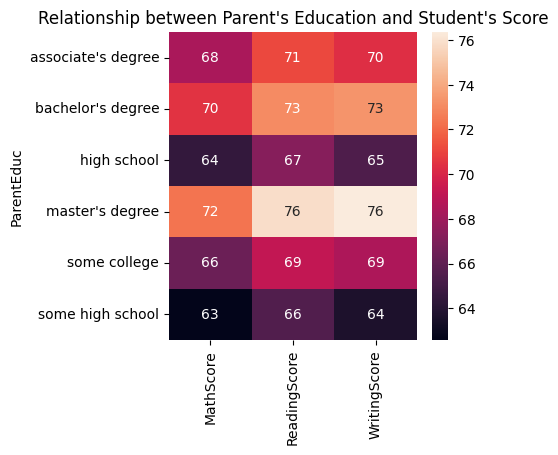

In [23]:
plt. figure(figsize= (4,4))
sns.heatmap(gb, annot = True)
plt. title("Relationship between Parent's Education and Student's Score")
plt. show()

from the abovel chart we have concluded that the education of the parents have a good impact on your scores

In [21]:
gb1 = data.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


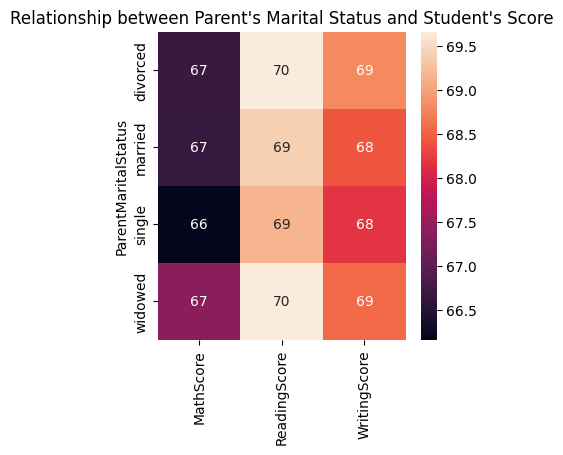

In [24]:
plt. figure(figsize= (4,4))
sns.heatmap(gb1, annot = True)
plt. title("Relationship between Parent's Marital Status and Student's Score")
plt. show()

from the abovel chart we have concluded that the Marital Status of the parents have no impact on the students scores

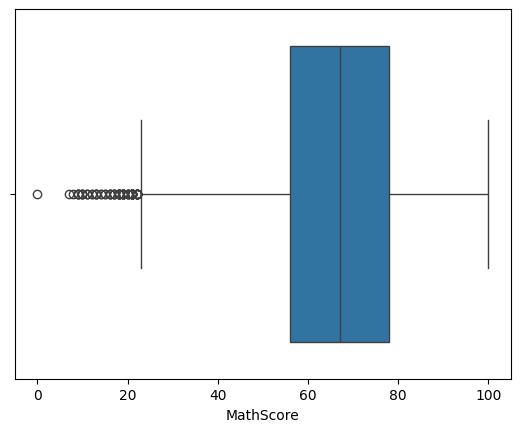

In [26]:
sns.boxplot(data = data, x = "MathScore")
plt .show()

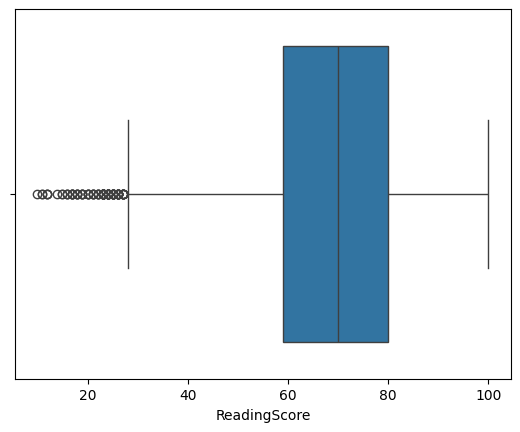

In [27]:
sns.boxplot(data = data, x = "ReadingScore")
plt .show()

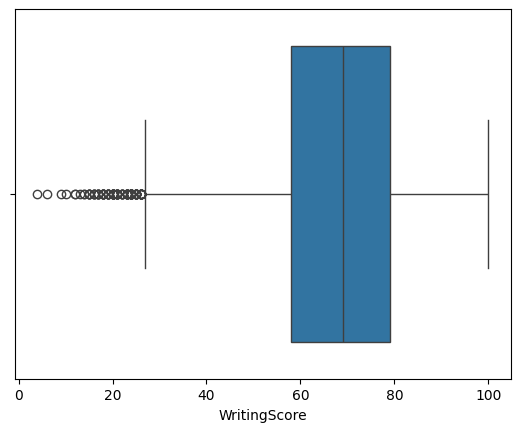

In [28]:
sns.boxplot(data = data, x = "WritingScore")
plt .show()

In [29]:
print(data["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Groups

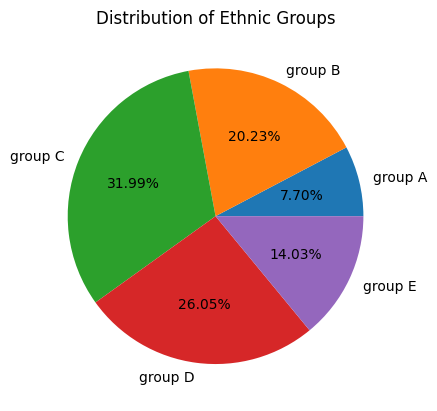

In [47]:
groupA = data.loc[(data['EthnicGroup'] == "group A")].count()
groupB = data.loc[(data['EthnicGroup'] == "group B")].count()
groupC = data.loc[(data['EthnicGroup'] == "group C")].count()
groupD = data.loc[(data['EthnicGroup'] == "group D")].count()
groupE = data.loc[(data['EthnicGroup'] == "group E")].count()

labels = ["group A", "group B", "group C", "group D", "group E"]

mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

plt.pie(mlist, labels=labels, autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()


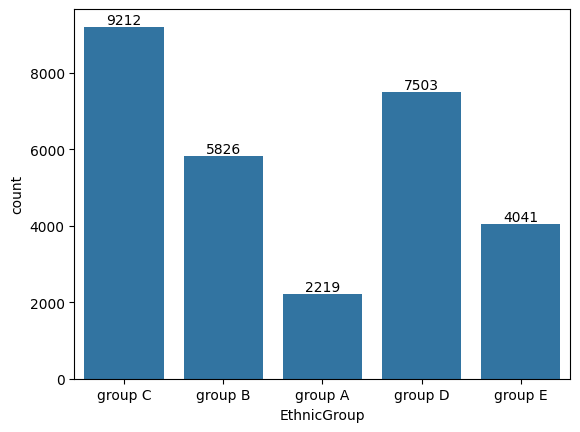

In [49]:
a = sns.countplot(data=data, x='EthnicGroup')
a.bar_label(a.containers[0])
plt.show()